In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import glob

## Utility Functions

In [7]:
def extract_form(form):
  actual_form = form.split('-')
  return actual_form[0] + '-' + actual_form[1]

In [12]:
def extract_form_number(form):
  form = ast.literal_eval(form)
  num_form = len(form)
  return num_form

## IAM Dataset Distribution

In [4]:
iam_writer_info = pd.read_csv('../Data/Writers-info.csv')
iam_writer_info = iam_writer_info.loc[iam_writer_info['NativeLanguage'] != 'Swiss German']
iam_writer_info['NativeLanguage'].value_counts()

NativeLanguage
German    19
French    16
Name: count, dtype: int64

In [23]:
# iam_writer_info['num_form'] = np.vectorize(extract_form_number)(iam_writer_info['images_path'])
feature_store = pd.read_csv('../Final-Version/Final-Data/All-Writers-Feature-Vectors-GrayScale.csv', index_col=[0])
iam_dist_df = feature_store[['name','form']]
iam_dist_df = pd.merge(iam_dist_df, iam_writer_info[['name', 'NativeLanguage']], how='inner', on='name')
iam_dist_df = iam_dist_df.rename(columns={'form':'image'})
iam_dist_df['form'] = np.vectorize(extract_form)(iam_dist_df['image'])
iam_dist_df

,name,image,NativeLanguage,form
0,10000,z01-000-03,German,z01-000
1,10000,z01-000-02,German,z01-000
2,10000,z01-000-01,German,z01-000
3,10000,z01-000-05,German,z01-000
4,10000,z01-000-04,German,z01-000
...,...,...,...,...
2578,10220,r09-711z-01,German,r09-711z
2579,10220,r09-711z-05,German,r09-711z
2580,10220,r09-711z-04,German,r09-711z
2581,10220,r09-711z-06,German,r09-711z


In [29]:
iam_form_grouped = iam_dist_df.drop_duplicates(subset=['form'],keep='first')
iam_form_grouped['cnt'] = 1

form_per_class_group = iam_form_grouped.groupby(['NativeLanguage', 'name'], as_index=False).sum()
display(form_per_class_group)


/var/folders/_6/j4m6pp9d00j5b30fngnhrm880000gn/T/ipykernel_81991/11873445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iam_form_grouped['cnt'] = 1


,NativeLanguage,name,image,form,cnt
0,French,10004,a02-082-04a03-014-02a03-037-03b01-113-08c02-04...,a02-082a03-014a03-037b01-113c02-049c03-000cd01...,16
1,French,10007,a01-063x-04a02-050-08a03-023-01b04-000-04c02-0...,a01-063xa02-050a03-023b04-000c02-026c02-035c04...,13
2,French,10008,a01-077-03a03-068-00a04-000-04c02-078-05c04-08...,a01-077a03-068a04-000c02-078c04-089d04-021e02-...,16
3,French,10010,a01-117-04a04-015-04b02-013-04b05-032-09b06-01...,a01-117a04-015b02-013b05-032b06-015c06-083d04-...,16
4,French,10011,a01-000u-01a01-014x-03a01-053x-02a02-004-01b04...,a01-000ua01-014xa01-053xa02-004b04-187c02-007c...,15
5,French,10012,a01-003x-01b01-127-08b04-081-01b05-017-04b06-0...,a01-003xb01-127b04-081b05-017b06-000b06-012c04...,16
6,French,10015,a01-020-04a02-037-09a02-102-03a06-051-03b01-01...,a01-020a02-037a02-102a06-051b01-014c03-000ed04...,16
7,French,10017,a02-000-06a02-008-01a03-017-05a03-020-04a06-10...,a02-000a02-008a03-017a03-020a06-100b01-044b06-...,15
8,French,10018,a01-000x-02a03-030-03a04-066-01b02-102-08b03-0...,a01-000xa03-030a04-066b02-102b03-025b04-134c02...,16
9,French,10020,a01-011x-04a02-057-02a03-011-07a03-040-01a03-0...,a01-011xa02-057a03-011a03-040a03-054a03-066a06...,16


Text(0, 0.5, 'Number of Writers')

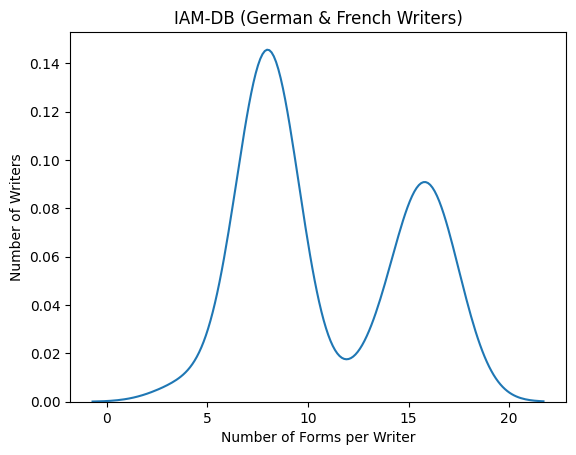

In [48]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# sns.histplot(data=form_per_class_group['cnt'], kde=True, ax=axes[0], bins=5, color="skyblue")
sns.kdeplot(data=form_per_class_group['cnt'], bw_adjust=0.8)
plt.title("IAM-DB (German & French Writers)")
plt.xlabel("Number of Forms per Writer")
plt.ylabel("Number of Writers")

In [50]:
iam_dist_df['img_cnt'] = 1
iam_image_per_form = iam_dist_df.groupby(['form', 'NativeLanguage'], as_index=False).sum()
iam_image_per_form

,form,NativeLanguage,name,image,img_cnt
0,a01-000u,French,60066,a01-000u-01a01-000u-03a01-000u-02a01-000u-06a0...,6
1,a01-000x,French,50090,a01-000x-02a01-000x-03a01-000x-01a01-000x-00a0...,5
2,a01-003,German,70063,a01-003-06a01-003-07a01-003-05a01-003-04a01-00...,7
3,a01-003x,French,50060,a01-003x-01a01-003x-00a01-003x-02a01-003x-03a0...,5
4,a01-011x,French,50100,a01-011x-04a01-011x-01a01-011x-00a01-011x-02a0...,5
...,...,...,...,...,...
378,r09-711z,German,71540,r09-711z-03r09-711z-02r09-711z-01r09-711z-05r0...,7
379,z01-000,German,70000,z01-000-03z01-000-02z01-000-01z01-000-05z01-00...,7
380,z01-010,German,10000,z01-010-01,1
381,z01-010a,German,20000,z01-010a-01z01-010a-02,2


Text(0, 0.5, 'Number of Writers')

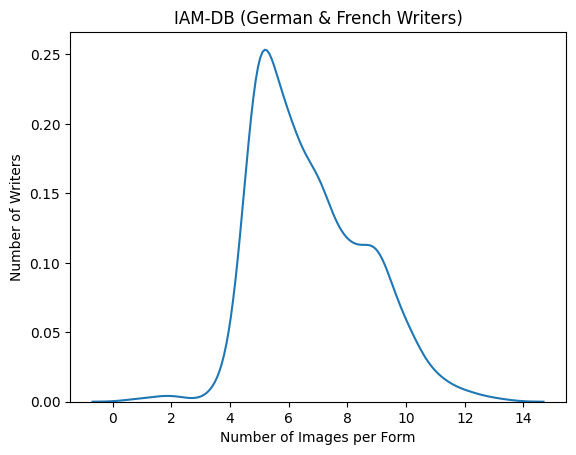

In [53]:
sns.kdeplot(data=iam_image_per_form['img_cnt'], bw_adjust=1)
plt.title("IAM-DB (German & French Writers)")
plt.xlabel("Number of Images per Form")
plt.ylabel("Number of Writers")

Text(13.819444444444452, 0.5, 'Writers')

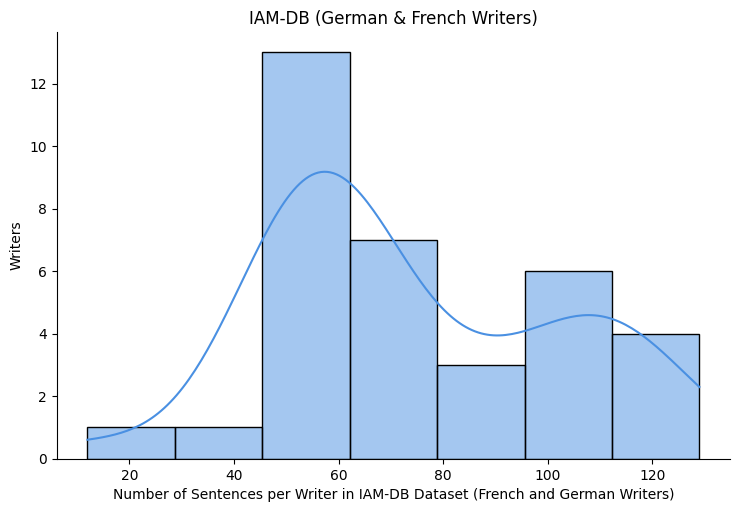

In [72]:
## Number of Images per Writer
iam_dist_df
images_per_writer_per_class_group = iam_dist_df.groupby(['name','NativeLanguage'], as_index=False).sum()
sns.displot(data=images_per_writer_per_class_group['img_cnt'], kde=True, height=5, aspect=1.5, color="#4a90e2", edgecolor="black")
plt.title("IAM-DB (German & French Writers)")
plt.xlabel('Number of Sentences per Writer in IAM-DB Dataset (French and German Writers)')
plt.ylabel('Writers')


,name,img_cnt
count,19.000000,19.000000
mean,10112.473684,60.000000
std,67.104701,19.407902
min,10000.000000,12.000000
25%,10071.500000,53.000000
50%,10104.000000,58.000000
75%,10164.500000,64.000000
max,10220.000000,113.000000


,name,img_cnt
count,16.000000,16.000000
mean,10045.437500,90.187500
std,68.685728,28.100341
min,10004.000000,45.000000
25%,10010.750000,68.750000
50%,10017.500000,100.000000
75%,10026.000000,110.000000
max,10219.000000,129.000000


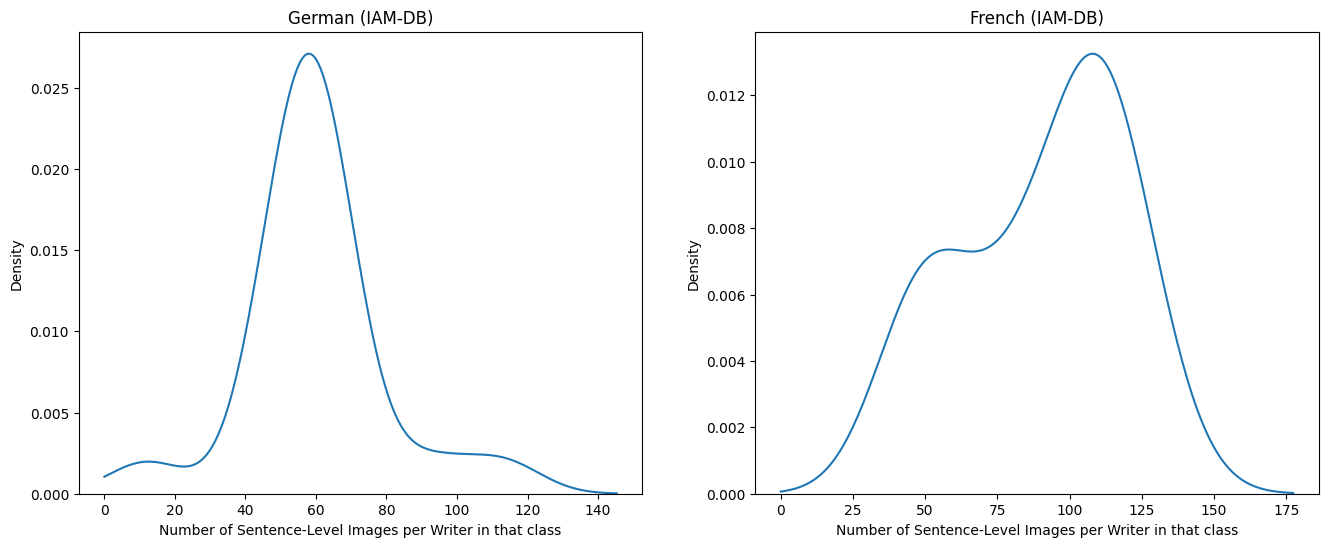

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.kdeplot(data=images_per_writer_per_class_group.loc[images_per_writer_per_class_group['NativeLanguage'] == 'German']['img_cnt'], ax=axes[0], clip=(0,None))
sns.kdeplot(data=images_per_writer_per_class_group.loc[images_per_writer_per_class_group['NativeLanguage'] == 'French']['img_cnt'], ax=axes[1], clip=(0,None))

axes[0].set_title('German (IAM-DB)')
axes[0].set_xlabel('Number of Sentence-Level Images per Writer in that class')
axes[1].set_title('French (IAM-DB)')
axes[1].set_xlabel('Number of Sentence-Level Images per Writer in that class')

display(images_per_writer_per_class_group.loc[images_per_writer_per_class_group['NativeLanguage'] == 'German'].describe())
display(images_per_writer_per_class_group.loc[images_per_writer_per_class_group['NativeLanguage'] == 'French'].describe())

## Bristol-Corpus Distribution

In [ ]:
bristol_writer_info = pd.read_csv('../Data/Bristol-Corpus/English-GrayScale/english_df.csv')
bristol_writer_info['NativeLanguage'].value_counts()


NativeLanguage
English    22
Name: count, dtype: int64

Text(22.569444444444457, 0.5, 'Writers')

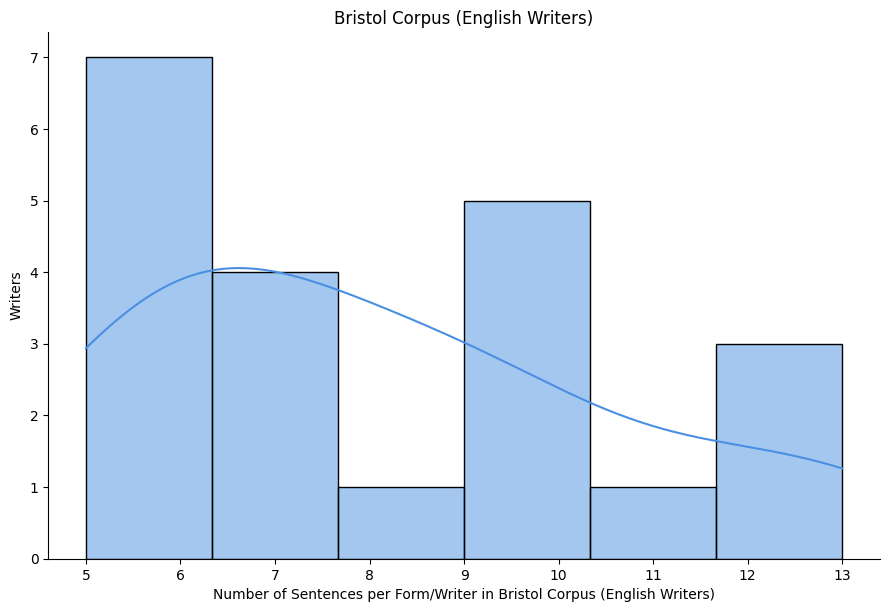

In [73]:
num_img_list = []
for i in bristol_writer_info['images_path']:
  i = ast.literal_eval(i)
  for j in i:
    j = j.replace('./', '../')
    image_list = glob.glob(j)
    # print(image_list)
    num_img_list.append(len(image_list))
    
bristol_writer_info['num_img'] = num_img_list

sns.displot(data=bristol_writer_info['num_img'], kde=True, height=6, aspect=1.5, color="#4a90e2", edgecolor="black")
plt.title("Bristol Corpus (English Writers)")
plt.xlabel('Number of Sentences per Form/Writer in Bristol Corpus (English Writers)')
plt.ylabel('Writers')

## Comparison Between Two Datasets

,name,NativeLanguage,image,cnt,form
0,10000,German,z01-000-03z01-000-02z01-000-01z01-000-05z01-00...,12,z01-000z01-000z01-000z01-000z01-000z01-000z01-...
1,10004,French,a02-082-04a02-082-03a02-082-02a02-082-00a02-08...,109,a02-082a02-082a02-082a02-082a02-082a03-014a03-...
2,10007,French,a01-063x-04a01-063x-01a01-063x-00a01-063x-02a0...,79,a01-063xa01-063xa01-063xa01-063xa01-063xa02-05...
3,10008,French,a01-077-03a01-077-02a01-077-00a01-077-01a01-07...,118,a01-077a01-077a01-077a01-077a01-077a03-068a03-...
4,10009,German,a01-003-06a01-003-07a01-003-05a01-003-04a01-00...,92,a01-003a01-003a01-003a01-003a01-003a01-003a01-...
5,10010,French,a01-117-04a01-117-05a01-117-07a01-117-06a01-11...,129,a01-117a01-117a01-117a01-117a01-117a01-117a01-...
6,10011,French,a01-000u-01a01-000u-03a01-000u-02a01-000u-06a0...,88,a01-000ua01-000ua01-000ua01-000ua01-000ua01-00...
7,10012,French,a01-003x-01a01-003x-00a01-003x-02a01-003x-03a0...,110,a01-003xa01-003xa01-003xa01-003xa01-003xb01-12...
8,10015,French,a01-020-04a01-020-01a01-020-00a01-020-02a01-02...,110,a01-020a01-020a01-020a01-020a01-020a02-037a02-...
9,10017,French,a02-000-06a02-000-07a02-000-05a02-000-04a02-00...,118,a02-000a02-000a02-000a02-000a02-000a02-000a02-...


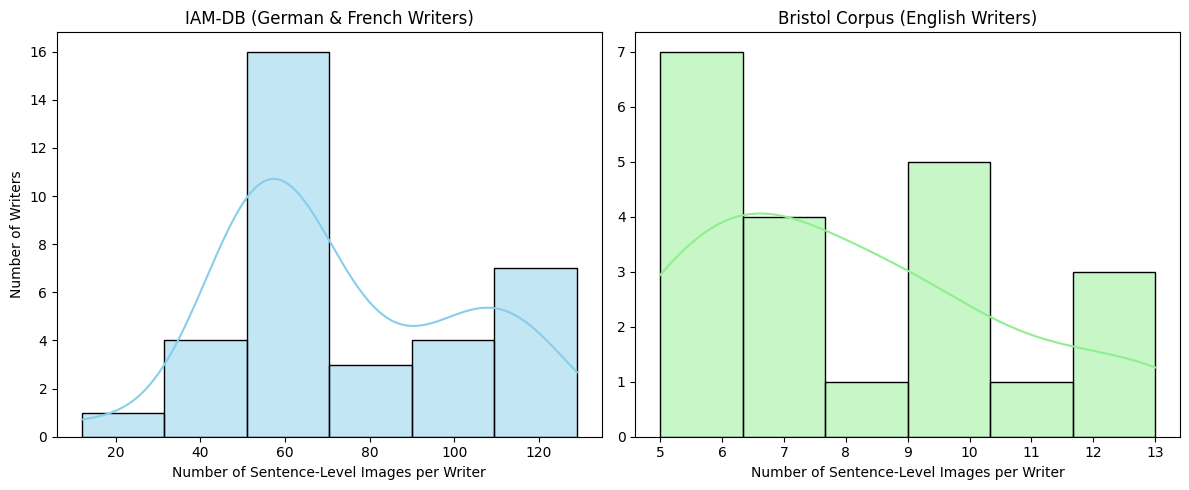

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

writers_info = pd.read_csv('../Final-Version/Final-Data/new-writers-info.csv')
writers_info = writers_info.loc[writers_info['NativeLanguage'] != 'English']
feature_store = pd.read_csv('../Final-Version/Final-Data/All-Writers-Feature-Vectors-GrayScale.csv', index_col=[0])
images_per_writer_per_class = feature_store[['name', 'form']]
images_per_writer_per_class = pd.merge(images_per_writer_per_class, writers_info[['name', 'NativeLanguage']], how='inner', on='name')
images_per_writer_per_class['cnt'] = 1
images_per_writer_per_class = images_per_writer_per_class.rename(columns={'form': 'image'})
images_per_writer_per_class['form'] = np.vectorize(extract_form)(images_per_writer_per_class['image'])

# display(images_per_writer_per_class)
images_per_writer_per_class_group = images_per_writer_per_class.groupby(['name','NativeLanguage'], as_index=False).sum()
display(images_per_writer_per_class_group)

# IAM-DB Plot
sns.histplot(data=images_per_writer_per_class_group['cnt'], kde=True, ax=axes[0], bins=6, color="skyblue")
axes[0].set_title("IAM-DB (German & French Writers)")
axes[0].set_xlabel("Number of Sentence-Level Images per Writer")
axes[0].set_ylabel("Number of Writers")

english_writer_info = pd.read_csv('../Data/Bristol-Corpus/English-GrayScale/english_df.csv')

num_img_list = []
for i in english_writer_info['images_path']:
  i = ast.literal_eval(i)
  for j in i:
    j = j.replace('./', '../')
    image_list = glob.glob(j)
    # print(image_list)
    num_img_list.append(len(image_list))
    
english_writer_info['num_img'] = num_img_list
# display(english_writer_info)
# Bristol Plot
sns.histplot(data=english_writer_info['num_img'], kde=True, ax=axes[1], bins=6, color="lightgreen")
axes[1].set_title("Bristol Corpus (English Writers)")
axes[1].set_xlabel("Number of Sentence-Level Images per Writer")
axes[1].set_ylabel("")

plt.tight_layout()